# Quick Look

Created on: May 4th, 2022 \
Author: Johnny Esteves

## Data: Feb 17th 2022

In [1]:
import numpy as np
obsDate = '20220217'

In [2]:
int(obsDate)*10**5+1

2022021700001

### PTC dataset

In [3]:
import lsst.daf.butler as dB

butler = dB.Butler("/repo/main", collections=[f"u/jesteves/comcam/ptc_{obsDate}"])
detector = (0, 1, 2, 3, 4, 5, 6, 7, 8)
exposure = [int(obsDate)*10**5+200, int(obsDate)*10**5+201] # e.g., [2021071500001, 2021071500002]

# For detector "0":
ptc = butler.get('ptc', detector=detector[0], exposure=exposure[0], instrument='LSSTComCam')

In [4]:
out = ptc.toDict()

In [5]:
print(out.keys())

dict_keys(['metadata', 'ptcFitType', 'covMatrixSide', 'ampNames', 'badAmps', 'inputExpIdPairs', 'expIdMask', 'rawExpTimes', 'rawMeans', 'rawVars', 'gain', 'gainErr', 'noise', 'noiseErr', 'ptcFitPars', 'ptcFitParsError', 'ptcFitChiSq', 'covariances', 'covariancesModel', 'covariancesSqrtWeights', 'aMatrix', 'bMatrix', 'covariancesModelNoB', 'aMatrixNoB', 'finalVars', 'finalModelVars', 'finalMeans', 'photoCharge'])


In [6]:
ptc._metadata.toDict()

{'OBSTYPE': 'PTC',
 'PTC_SCHEMA': 'Gen3 Photon Transfer Curve',
 'PTC_VERSION': 1.0,
 'INSTRUME': 'LSSTComCam',
 'RAFTNAME': None,
 'SLOTNAME': None,
 'DETECTOR': None,
 'DET_NAME': None,
 'DET_SER': None,
 'FILTER': None,
 'CALIB_ID': None,
 'CALIBCLS': 'lsst.ip.isr.ptcDataset.PhotonTransferCurveDataset',
 'PTC_FIT_TYPE': 'EXPAPPROXIMATION',
 'CALIBDATE': '2022-05-04T10:11:49.347840',
 'CALIB_CREATION_DATE': '2022-05-04',
 'CALIB_CREATION_TIME': '10:11:49.347840'}

In [7]:
ptc.ptcFitPars

{'C00': [-1.5825600646857918e-06, 1.5934890436841647, 358.59952771064553],
 'C01': [-1.659999593995506e-06, 1.5939180571943952, 278.965850105785],
 'C02': [-1.9773047126151596e-06, 1.5724898175894573, 58.313541671249894],
 'C03': [-1.5459600864942443e-06, 1.6292036901670595, 431.3667370059667],
 'C04': [-1.5496379054556105e-06, 1.6309847534205324, 351.41400621749756],
 'C05': [-1.4404395567641577e-06, 1.649331503417277, 384.16091442984606],
 'C06': [-1.346088431911332e-06, 1.681415564343416, 549.2523229905861],
 'C07': [-9.470982212815021e-07, 1.7499328898551518, 982.1101340248862],
 'C10': [-1.2952625267061025e-06, 1.6425453189696055, 512.337279834549],
 'C11': [-1.3014299983750424e-06, 1.646317043459625, 485.8967243141889],
 'C12': [-1.32696427403262e-06, 1.6528902006733668, 549.4527113639044],
 'C13': [-1.2028434214936474e-06, 1.6808673431576897, 706.0566253805088],
 'C14': [-1.2028229451222477e-06, 1.696130485066349, 827.6536622555566],
 'C15': [-1.5831933148503008e-06, 1.628618464

In [8]:
ptc.gain

{'C00': 1.5934890436841647,
 'C01': 1.5939180571943952,
 'C02': 1.5724898175894573,
 'C03': 1.6292036901670595,
 'C04': 1.6309847534205324,
 'C05': 1.649331503417277,
 'C06': 1.681415564343416,
 'C07': 1.7499328898551518,
 'C10': 1.6425453189696055,
 'C11': 1.646317043459625,
 'C12': 1.6528902006733668,
 'C13': 1.6808673431576897,
 'C14': 1.696130485066349,
 'C15': 1.6286184647193653,
 'C16': 1.6421582887749258,
 'C17': 1.6859324567485885}

In [9]:
ptc.finalMeans['C00']

[6286.114845107237,
 12578.318263048028,
 18873.710528127922,
 25172.272471328284,
 31473.89262365141,
 37784.798188047396,
 44067.86692905049,
 50345.618442522085,
 56592.22245941781,
 62852.51554137558,
 69144.76425963402,
 75457.30812919704,
 81772.7150042631,
 88091.0917063659,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [10]:
ptc.rawMeans['C00']

[6286.114845107237,
 12578.318263048028,
 18873.710528127922,
 25172.272471328284,
 31473.89262365141,
 37784.798188047396,
 44067.86692905049,
 50345.618442522085,
 56592.22245941781,
 62852.51554137558,
 69144.76425963402,
 75457.30812919704,
 81772.7150042631,
 88091.0917063659,
 94420.03636583153,
 100083.06888351301,
 103803.33972895541,
 105652.56667615316,
 106564.19092816781,
 106836.67438596433]

In [11]:
channels = [f"C{i:02d}" for i in np.array([0,1,2,3,4,5,6,7,10,11,12,13,14,15,16,17])]
channels

['C00',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17']

In [54]:

channels = [f"C{i:02d}" for i in np.array([0,1,2,3,4,5,6,7,10,11,12,13,14,15,16,17])]

def get_turnoff(ptc):
    res = []
    flag = []
    gain = []
    for ci in channels:
        means = np.array(ptc.finalMeans[ci])
        gi = float(ptc.gain[ci])
        isnan = np.isnan(means)
        gain.append(gi)
        if np.count_nonzero(~isnan)>0:
            res.append(means[~isnan][-1]*1e-3)
            flag.append(False)
        else:
            res.append(np.nan)
            flag.append(True)
    return np.array(res), np.array(flag), np.array(gain)

## Development: PTC Turnoff Code

In [55]:
# the aim here is to store the ptc turnoff mean value for the 16 channels and the 9 detectors

In [56]:
import lsst.daf.butler as dB

butler = dB.Butler("/repo/main", collections=[f"u/jesteves/comcam/ptc_{obsDate}_flat"])
detector = (0, 1, 2, 3, 4, 5, 6, 7, 8)
sensors = ("S00","S01","S02","S10","S11","S12","S20","S21","S22")

exposure = [int(obsDate)*10**5+200, int(obsDate)*10**5+201] # e.g., [2021071500001, 2021071500002]

turnoffs = dict().fromkeys(sensors)
for i,Sii in zip(detector,sensors):
    print(f'Sensor R22 {Sii}, detector {i}')
    ptc = butler.get('ptc', detector=i, exposure=exposure[0], instrument='LSSTComCam')
    vals, flag, gains = get_turnoff(ptc)
    turnoffs[Sii] = vals
    turnoffs[Sii+'_flag'] = flag
    turnoffs[Sii+'_gain'] = gains

Sensor R22 S00, detector 0
Sensor R22 S01, detector 1
Sensor R22 S02, detector 2
Sensor R22 S10, detector 3
Sensor R22 S11, detector 4
Sensor R22 S12, detector 5
Sensor R22 S20, detector 6
Sensor R22 S21, detector 7
Sensor R22 S22, detector 8


In [57]:
## erroneous estimates; spotted on the plots
turnoffs['S10'][12] = np.nan
turnoffs['S10'][13] = np.nan

### Plot PTC turnoff 

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [47]:
turnoffs_matrix = np.full((len(sensors),len(channels)), np.nan)
for i,Sii in zip(detector,sensors):
    turnoffs_matrix[i] = turnoffs[Sii]

In [48]:
markers = ['D','x','v','^','<','>','X','s','P']

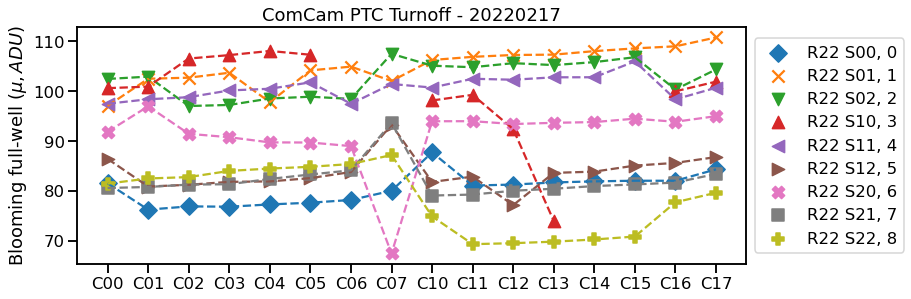

In [49]:
plt.figure(figsize=(13,4.5))
sensors = ("S00","S01","S02","S10","S11","S12","S20","S21","S22")
for i,Sii in zip(detector,sensors):
    plt.scatter(channels,turnoffs[Sii],s=150,marker=markers[i],label=f'R22 {Sii}, {i}')
    plt.plot(channels,turnoffs[Sii],color='C%i'%i,ls='--')

# plt.axhline(175,color='k',ls='--',lw=3,label='Requirement')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r'Blooming full-well ($\mu, ADU$)',fontsize=18)
plt.title(f'ComCam PTC Turnoff - {obsDate}')
plt.tight_layout()
plt.savefig(f'blooming_full_well_channels_{obsDate}.png',dpi=100,facecolor='w',transparent=False)

Text(0.5, 1.0, 'ComCam PTC Turnoff - 20220217')

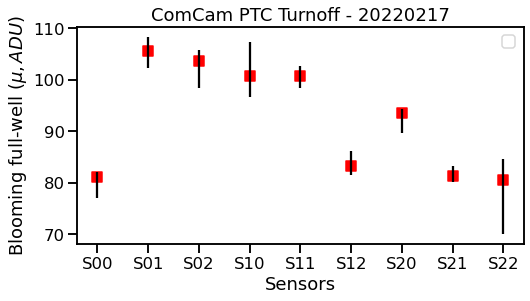

In [50]:
mean_sensors = np.nanmedian(turnoffs_matrix, axis=1)
p16_sensors = mean_sensors-np.nanpercentile(turnoffs_matrix, 16, axis=1)
p84_sensors = np.nanpercentile(turnoffs_matrix, 84, axis=1)-mean_sensors

plt.figure(figsize=(8,4))
plt.errorbar(sensors,mean_sensors,yerr=[p16_sensors,p84_sensors],ls='None',color='k')
plt.scatter(sensors,mean_sensors,s=100,marker='s',color='r')

# plt.axhline(175,color='k',ls='--',lw=3,label='Requirement')
plt.legend()
plt.ylabel(r'Blooming full-well ($\mu, ADU$)',fontsize=18)

plt.xlabel(r'Sensors',fontsize=18)
plt.title(f'ComCam PTC Turnoff - {obsDate}')

Text(0.5, 1.0, 'ComCam PTC Turnoff - 20220217')

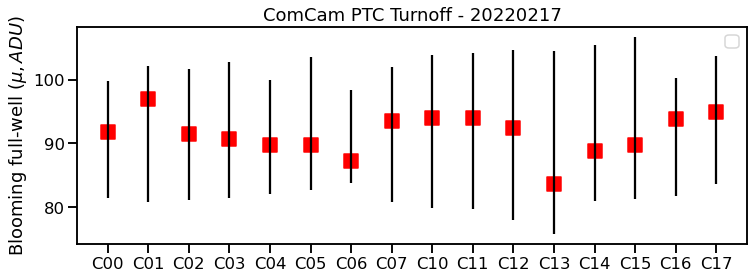

In [51]:
mean_channels = np.nanmedian(turnoffs_matrix, axis=0)
p16_channels = mean_channels-np.nanpercentile(turnoffs_matrix, 16, axis=0)
p84_channels = np.nanpercentile(turnoffs_matrix, 84, axis=0)-mean_channels
plt.figure(figsize=(12,4))
plt.errorbar(channels,mean_channels,yerr=[p16_channels,p84_channels],ls='None',color='k')
plt.scatter(channels,mean_channels,s=200,marker='s',color='r')
# plt.axhline(175,color='k',ls='--',lw=3,label='Requirement')
plt.legend()
plt.ylabel(r'Blooming full-well ($\mu, ADU$)',fontsize=18)
plt.title(f'ComCam PTC Turnoff - {obsDate}')

# Plot Detectors with Gains

Section added from the suggestion in the #comcam-work-log channel.\
Date: 12th May, 2022

## Focal Plane Layout

The focal plane is an array composed of individual rafts and corner raft. Each raft has 9 sensors and each sensor has 16 channels. 

### Raft Sensor Layout
The sensor label goes from the bottom left to the top right. Example:
<li> For a given row, from left to right, you have: S00, S01, S02.
<li> For a given column, from bottom to top, you have: S00, S10, S20.
</li>

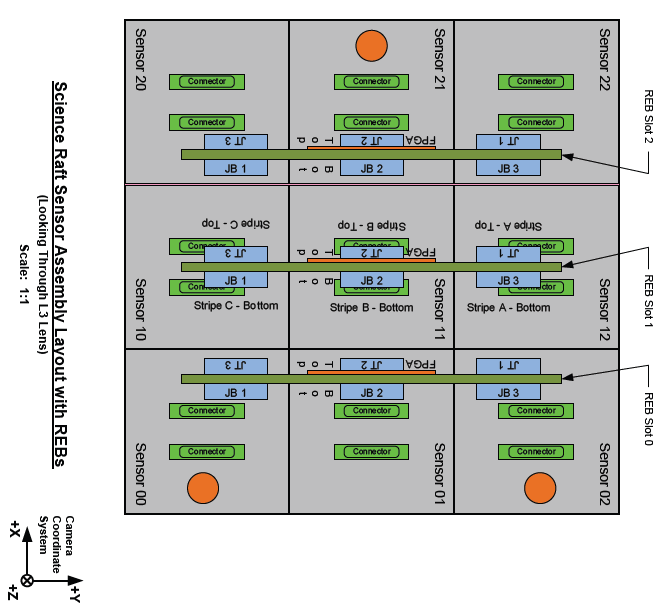

In [25]:
sensor_label = []
for i in np.arange(2,-1,-1):
    for j in range(3):
        sensor_label.append('S%i%i'%(i,j))
    # sensor_label.append(row)

In [26]:
sensor_label

['S20', 'S21', 'S22', 'S10', 'S11', 'S12', 'S00', 'S01', 'S02']

### Sensor Layout

The sensor layout is composed by 16 channels, 8 on the top and 8 on the bottom.

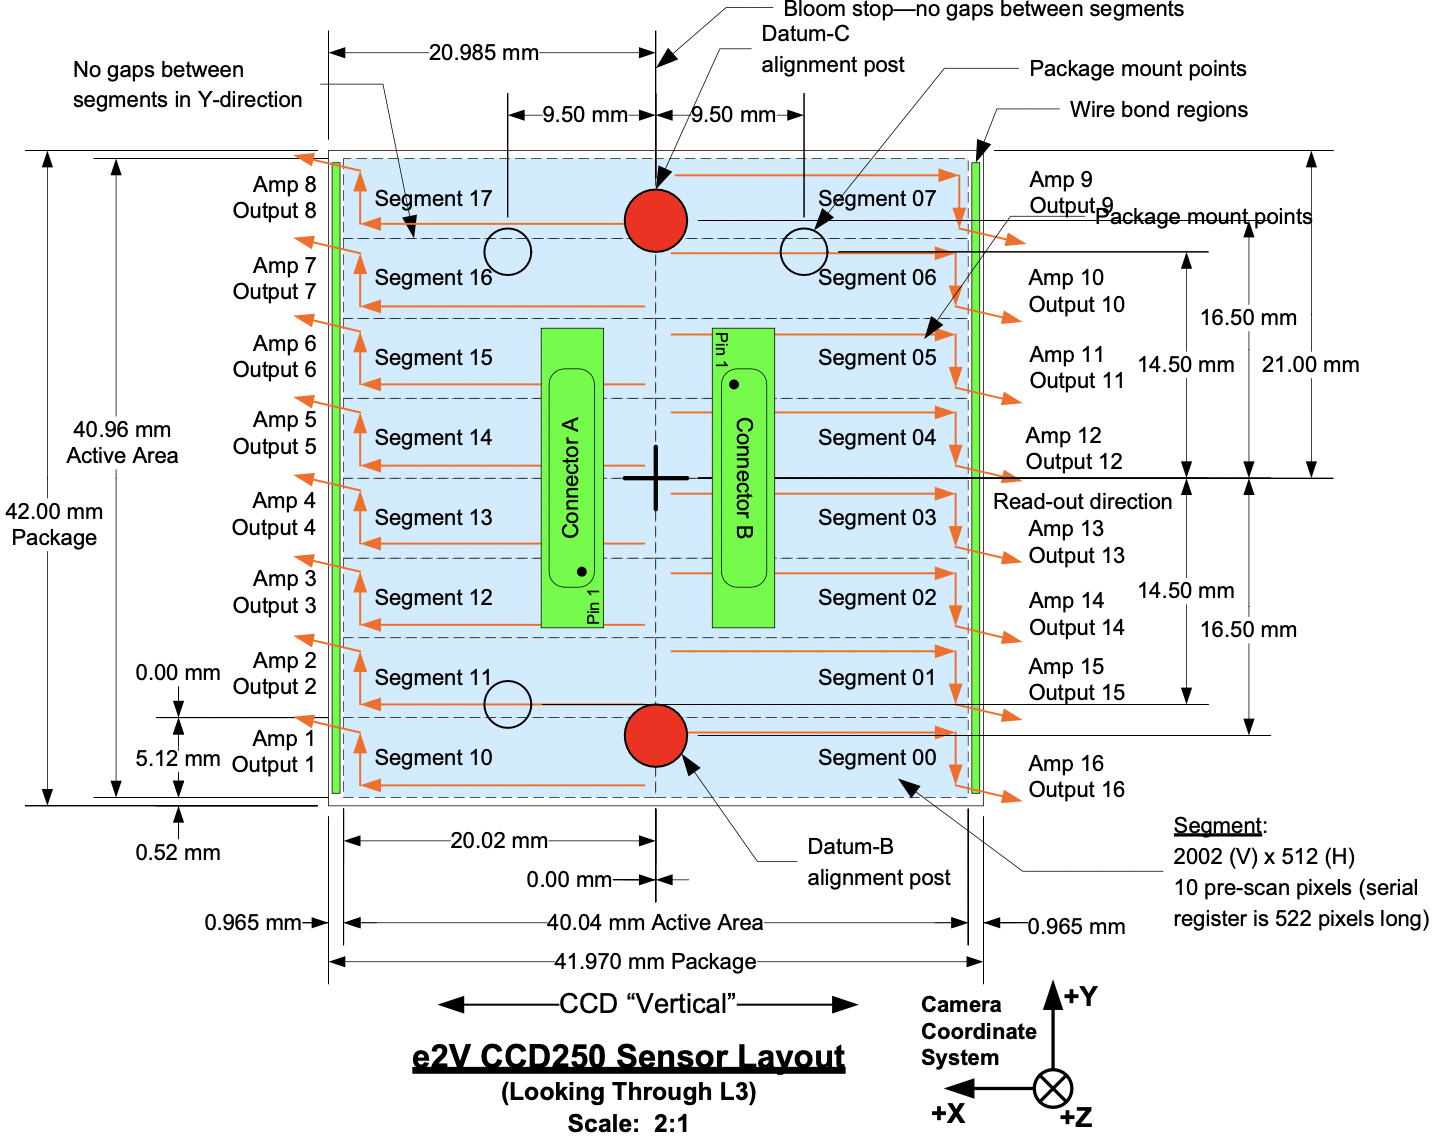

In [27]:
segments = [channels[:8],channels[8:]]
segments

[['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07'],
 ['C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17']]

In [28]:
height, length = 2*2002, 8*512
print(f'The dimensions are: {height}, {length}')

The dimensions are: 4004, 4096


In [29]:
def fill_gain_per_segment(x):
    sensor = np.zeros((height,length),dtype=float)
    idx = 0
    for j in range(2):
        jj = j*2002 # top/bottom sensors
        for i,ii in enumerate(np.arange(0,length,512)):
            #print(f'{channels[idx]}: {x[idx]}')
            sensor[jj:jj+2002,ii:ii+512] = x[idx]
            idx+=1
    return sensor

In [62]:
def plot_gain_per_sensor(img,ax=None,is_label=True,vmax=100,vmin=75):
    if ax is None: ax=plt.axes()
    im = ax.imshow(img,vmin=vmin,vmax=vmax,origin='lower',cmap='inferno')
    
    # draw channel labels
    if is_label:
        i=0
        for j in range(2):
            for ii in np.arange(0,length,512):
                ax.text(ii+100,(j+1)*1700,channels[i],fontsize=10,color='red')
                i+=1
    return im

Text(0.5, 1.0, 'S12')

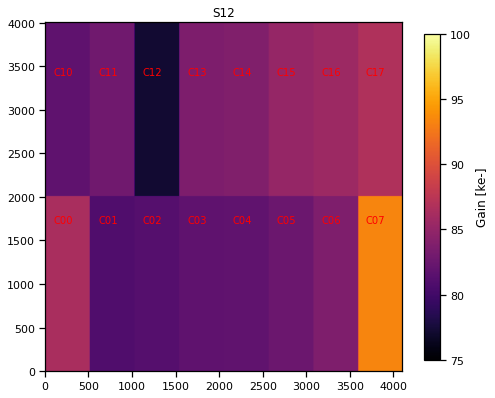

In [63]:
plt.figure(figsize=(8,8))
img = plot_gain_per_sensor(fill_gain_per_segment(turnoffs['S12']),ax=plt.axes())
plt.colorbar(img,shrink=0.75).set_label('Gain [ke-]')
plt.title('S12')

In [68]:
raft = dict().fromkeys(sensor_label)

print('Sensors')
for si in sensor_label:
    print(f'{si}')
    raft[si+'_g'] = fill_gain_per_segment(turnoffs[si]*turnoffs[si+'_gain'])
    raft[si] = fill_gain_per_segment(turnoffs[si])

Sensors
S20
S21
S22
S10
S11
S12
S00
S01
S02


In [69]:
sns.set_context('notebook')

Text(0.5, 0.98, 'ComCam - 20220217')

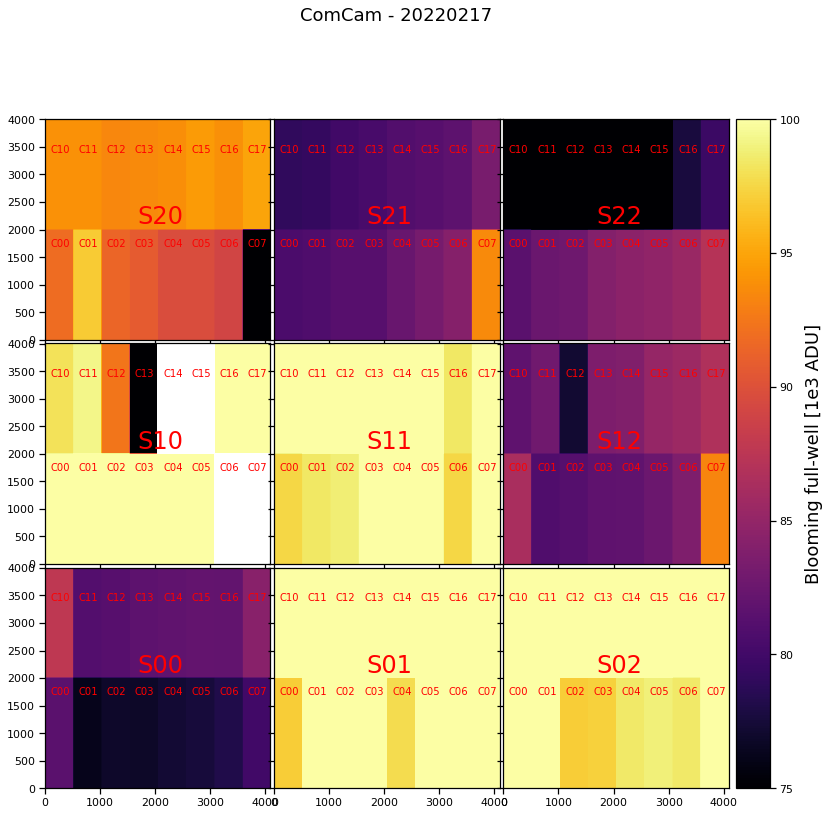

In [71]:
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(figsize=(3*4+1,3*4+1))
grid = AxesGrid(fig, 111,
                nrows_ncols=(3, 3),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1)

for si,ax in zip(sensor_label,grid):
    ax.text(2100,2100,si,fontsize=24, ha='center', color='red')
    im = plot_gain_per_sensor(raft[si],ax=ax,vmin=75,vmax=100)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im).set_label('Blooming full-well [1e3 ADU]',fontsize=18)
fig.suptitle(f'ComCam - {obsDate}',fontsize=18)
# fig.savefig('plots/blooming_full_well_comcam_adu_%s.pdf'%obsDate,dpi=100)

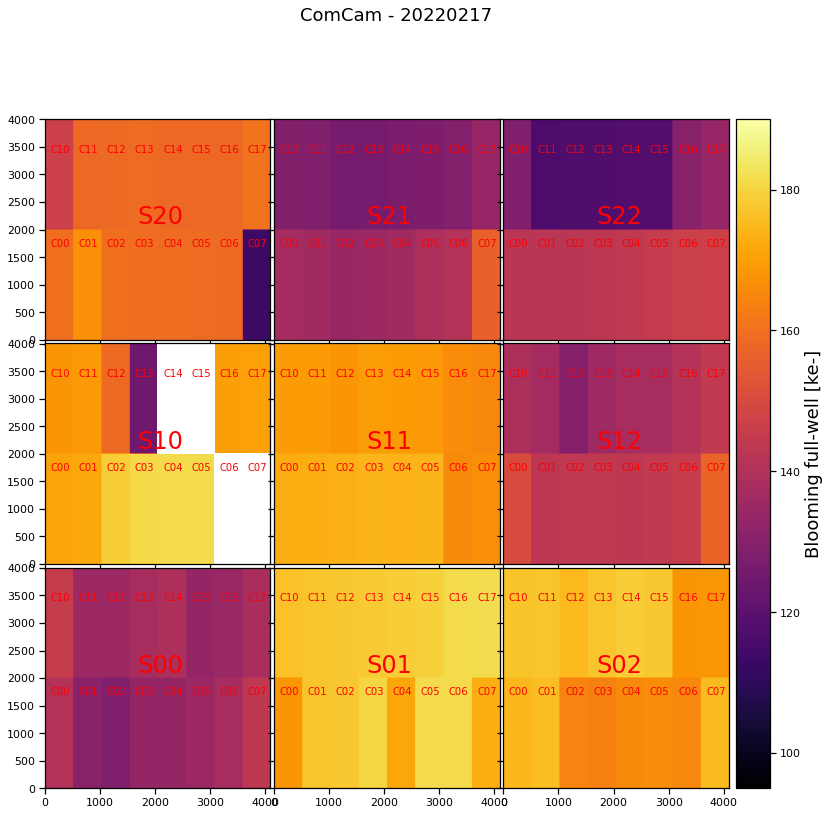

In [67]:
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(figsize=(3*4+1,3*4+1))
grid = AxesGrid(fig, 111,
                nrows_ncols=(3, 3),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1)

for si,ax in zip(sensor_label,grid):
    ax.text(2100,2100,si,fontsize=24, ha='center', color='red')
    im = plot_gain_per_sensor(raft[si+'_g'],ax=ax,vmin=95,vmax=190)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im).set_label('Blooming full-well [ke-]',fontsize=18)
fig.suptitle(f'ComCam - {obsDate}',fontsize=18)
fig.savefig('plots/blooming_full_well_comcam_%s.pdf'%obsDate,dpi=100)